<a href="https://colab.research.google.com/github/sharini05/caption_generator/blob/main/Cap_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests python-dotenv pillow


In [24]:
import requests
import base64
from PIL import Image
from IPython.display import display
from google.colab import files


Saving 6.jpg to 6 (1).jpg


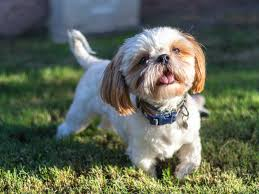

In [25]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = Image.open(image_path)
display(img)


In [26]:
with open(image_path, "rb") as img:
    b64_image = base64.b64encode(img.read()).decode("utf-8")

In [27]:
from dotenv import load_dotenv
import os

load_dotenv()
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")

prompt = (
    "Generate ONE short classy Instagram caption (max 12 words) "
    "and 5 relevant hashtags based on the image."
)

headers = {
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
    "Content-Type": "application/json"
}

payload = {
    "model": "openai/gpt-4o-mini",
    "messages": [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": prompt},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{b64_image}"
                    }
                }
            ]
        }
    ],
    "max_tokens": 100,
    "temperature": 0.7
}

response = requests.post(
    "https://openrouter.ai/api/v1/chat/completions",
    headers=headers,
    json=payload,
    timeout=30
)

data = response.json()
print(data["choices"][0]["message"]["content"])


"Life is better with a furry friend by my side. 🐾"

#DogLove #FurryFriend #ShihTzu #Pawtastic #PetJoy
